# **KMeans Clustering Core**

- Darlene Adams

### Standard Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn import set_config
set_config(transform_output='pandas')

import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/cust_seg.csv')
df = df.set_index('Customer Id')
df.head()

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [5]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [6]:
# Check to see if there are any duplicate rows
df.duplicated().sum()

0

In [7]:
df = df.dropna()
df.isna().sum().sum()

0

## Use KMeans to create various customer segments

In [8]:
# scale the data
x_scaled = StandardScaler().fit_transform(df)
x_scaled

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528
2,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222
3,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495
4,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528
5,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609
...,...,...,...,...,...,...,...,...
845,0.768304,-0.779325,-0.208705,-0.070714,-0.406283,-0.566235,-0.594950,-0.859025
847,-0.858398,0.298793,-0.208705,-0.315360,-0.564624,-0.315718,-0.594950,-0.477925
848,-1.233791,2.455029,-1.260817,-0.750285,0.590086,0.046209,1.680814,3.391707


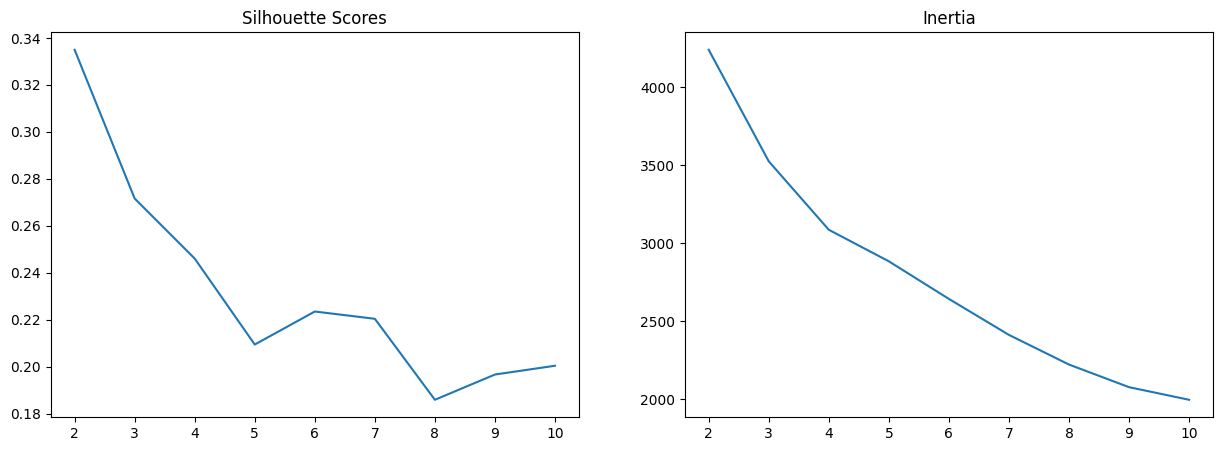

In [11]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(x_scaled)
  sils.append(silhouette_score(x_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [12]:
# Refit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, n_init= 'auto', random_state=42)
kmeans.fit(x_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [15]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
kmeans.fit(x_scaled)
silhouette_score(x_scaled, kmeans.labels_)

0.33496643365707623

In [17]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,41.855346,1.955975,15.503145,88.238994,3.886994,7.257063,0.301887,14.754717
1,1,32.804067,1.654344,6.297597,33.070240,0.867771,1.824148,0.249538,8.939741


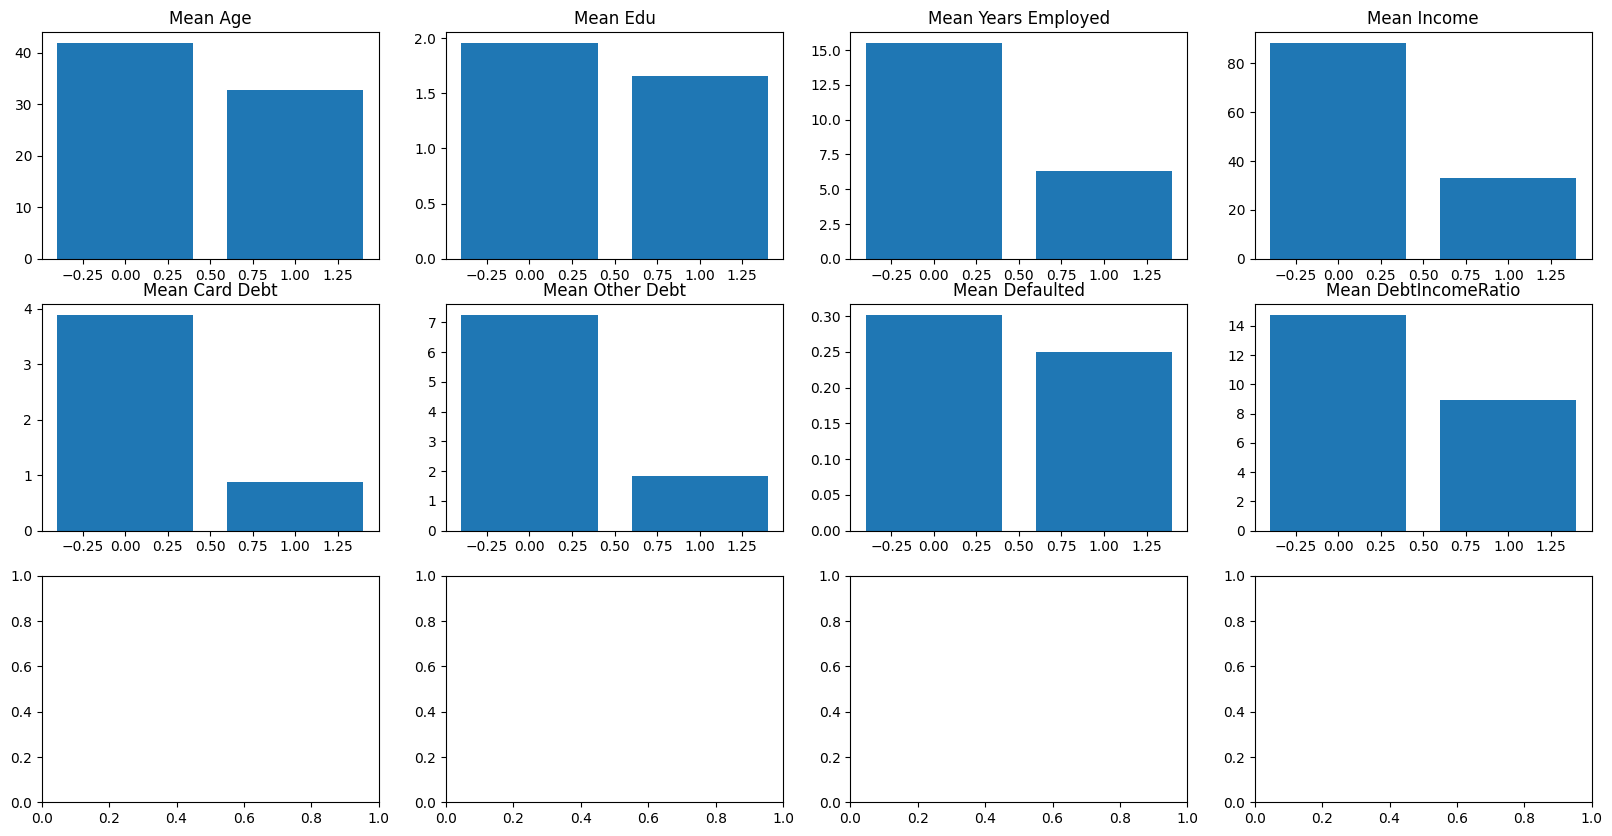

In [18]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

#### Clusters
- **Cluster 0**

This group is on average 40 plus they have higher education and have been in the work force the longest. The average inconme is over $80k, but they have much more in terms of debt, credit and otherwise. They have on average defaulted on ther loans more and have higher debt to income ratio.


- **Cluster 1**

This group is on average about their lower to mid 30's. The have the lowest time of employment as well as the lowest average income at about ~30k. They have less debt but that may be due to low approval rates.


- **Recommendations**

For cluster 0 althought they have more risk those that are credit worthy would benefit from marketing higher credit limits and rewards.

For those in cluster 1, secured cards and cashback cards will hold appeal.

